# Simple Linear Regression
___
by Abdullah

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

### Loading Data

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

df_train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


### Understanding 

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


#### Drop null values

In [9]:
df_train.dropna(inplace = True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


#### check duplicate

In [12]:
df_train.duplicated().sum()

0

#### Plotting 

<BarContainer object of 300 artists>

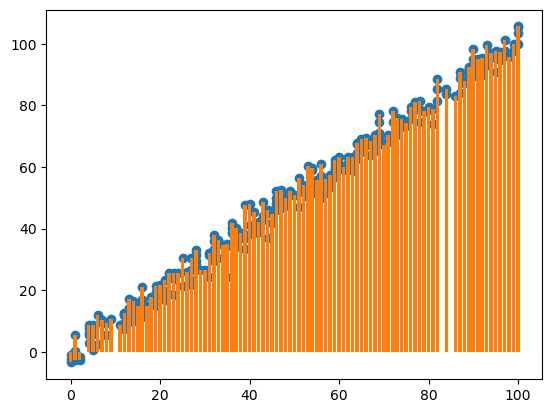

In [14]:
plt.scatter(x = 'x', y='y', data=df_test)
plt.bar(x = 'x', height='y', data=df_test)

<Axes: xlabel='x', ylabel='y'>

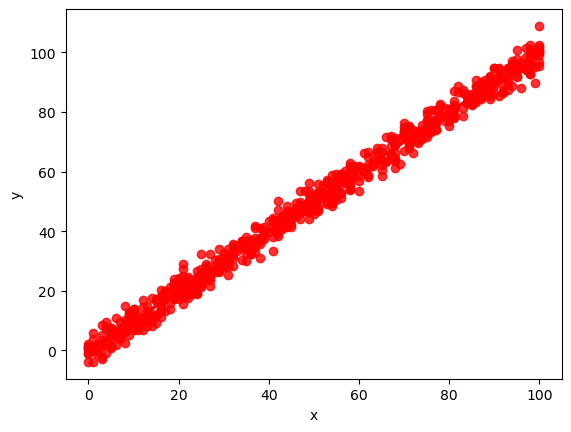

In [16]:
sns.regplot(x = 'x', y =  'y', data = df_train,  color='r')

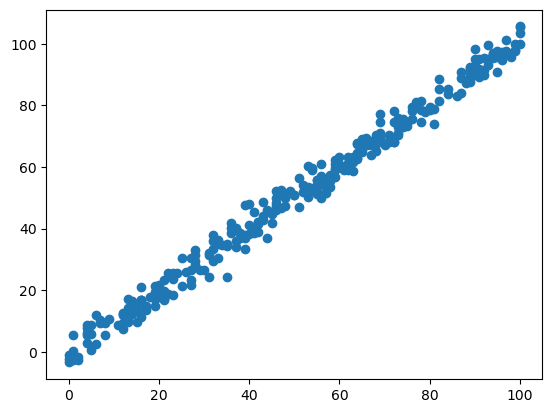

In [18]:
plt.scatter(x = 'x', y='y', data=df_test)

## Splitting

In [20]:
X = df_train[['x']]
y = df_train['y']
y

0      21.549452
1      47.464463
2      17.218656
3      36.586398
4      87.288984
         ...    
695    58.595006
696    94.625094
697    88.603770
698    63.648685
699    94.975266
Name: y, Length: 699, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.14, random_state=88)
print(X_train.shape, X_val.shape,y_val.shape )

(601, 1) (98, 1) (98,)


In [26]:
type(X_train)

pandas.core.frame.DataFrame

## Building Models

In [28]:
from sklearn.linear_model import LinearRegression, SGDRegressor

#### Using Linear Regression

In [30]:
l =LinearRegression()
l.fit(X_train, y_train)

LinearRegression()

In [32]:
l.coef_

array([1.00327421])

In [34]:
l.intercept_

-0.2582063988772134

In [36]:
l.score(X_train, y_train)

0.9912517876364073

In [38]:
y_pred_linear = l.predict(X_val)
y_pred_linear

array([20.81055194, 67.96443966, 69.97098808, 34.85639084,  9.77453567,
       44.88913291, 23.82037456, 21.81382615, 96.05611745, 74.98735911,
       74.98735911, 48.90222973, 48.90222973, 18.80400353, 48.90222973,
       91.03974642, 54.92187497, 21.81382615, 32.84984242, 50.90877815,
       97.05939166, 24.82364877,  6.76471305, 41.87931029, 89.033198  ,
       48.90222973, 80.00373014, 41.87931029, 57.93169759, 50.90877815,
       23.82037456, 46.89568132, 57.93169759, 66.96116546, 14.7909067 ,
       53.91860077, 34.85639084, 67.96443966, 37.86621346, 86.02337538,
       58.9349718 , 48.90222973,  3.75489043, 40.87603608, 63.95134284,
       49.90550394, 31.84656822, 41.87931029, 40.87603608, 66.96116546,
       19.80727774, 20.81055194, 26.83019718, 98.06266587, 25.82692298,
       70.97426228, 21.81382615, 41.87931029, 59.93824601, 91.03974642,
       59.93824601, 44.88913291, 23.82037456, 15.79418091, 98.06266587,
       54.92187497, 18.80400353, 26.83019718, 63.95134284, 44.88

In [40]:
y_val

310    27.305118
451    71.111899
266    72.953317
249    36.780350
309    13.934150
         ...    
107    30.231776
142    28.223258
598     2.267059
387    12.655378
111    78.674700
Name: y, Length: 98, dtype: float64

## Evaluation

 #### Linear Regrission Evaluation

In [42]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(y_val, y_pred_linear))

0.986293089899647


In [44]:
print(mean_absolute_error(y_val, y_pred_linear))

2.494648711395586


In [46]:
print(mean_squared_error(y_val, y_pred_linear))

9.54248384317654


In [48]:
y_val.mean()

47.00770919036735

#### Test Models

In [50]:
x_test = df_test[['x']]
y_test = df_test['y']

In [52]:
y_pred_linear_test =l.predict(x_test)

In [54]:
print(mean_absolute_error(y_test, y_pred_linear_test))

2.41165761736288


In [56]:
print(mean_squared_error(y_test, y_pred_linear_test))

9.39283023221175


#
## Model Deployment

In [58]:
import pickle

with open('simple_linear.pkl', 'wb') as model_file:
    pickle.dump(l, model_file)